# Ensemble Learning

![Ensemble](./images/Common-Ensemble-Methods.jpg)  

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


https://www.kaggle.com/datasets/uciml/mushroom-classification/data

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
from summarytools import dfSummary

dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,class[object],1. e2. p,"4,208 (51.8%)3,916 (48.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bwYnDMBRF0a9BhMlGwhhcjIuYYqcIdWOMtUhCNspiCog1gidE7qngYy6GBD9XSjFAwZnZ1cwuvQ8Z2LOUcu99xAj8PM8/IYSp9yGjyjnvzrlfgnvPhxCmdV3vMcZH72NGcxzHd0pp2rbtYmbE9oY3M4sxPpZlufU+ZlDX3geM4qv3AfgcxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yHizv48Aex8yIp5bHZ9z3lNKk/ER4L/knHcze/a+YwQMXtoxeDnJMeWDCm+2OrzFGjDlq8Bsrw1TvpOY7bVjyleHX+wN+FMXMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgw5TuJZ9SOKV8FZnttGLzUYfDS4AUKW2rfd+DJGgAAAABJRU5ErkJggg=="">",0(0.0%)
2,cap-shape[object],1. x2. f3. k4. b5. s6. c,"3,656 (45.0%)3,152 (38.8%)828 (10.2%)452 (5.6%)32 (0.4%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrElEQVR4nO3dQU7bUBiF0d+RRcvEURSJJbR7yCJYbBeRRXQPCOFBoUzSAXTQQYWRnfui+JwVPNAnO458oTudTgUJm9YHYD3ERozYiBEbMV1V3VbVTeuDXKDX0+n03PoQ16Tf7/f3wzDsWh/k0ozj+Nh13Q/BLacfhmF3OByet9vtS+vDXIqnp6evx+Nx9/DwcFNVYltIX1W13W5f7u7ufrU+zIW5bX2Aa+MBgRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiI6aveXqlpfZBL4vdxHv04jo/H43FXXqn5xziOj1X12voc18Rr4f/ntfCFdUbKpKzxyuaK1cjqBi+GLO2savBiyNLWGgcvnrob8aUuMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmJWta5ay895qVa3rrKaascGgRjrKmKWuLK5UjDJ7HWVtRJTzVpXWSvxGUusq1bxFMt8vtQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERsysdZW1Ep8xe11lrcRUNgjEWFcRM/XK5urFbJPWVRZULOHDdZUFFUuZuq6yoGI2X+oSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzEfDl6MWljKpMGLUQtL8Fo4MQYvxHhAIObvbbTcJjm3fr/f31dVWU9xbpthGHbvU741/c9RGvCZjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOmf19OVVlPcWZeCyfGuooYn9mI2XRd973rOn9igbPbVNW3qvrS+iBcP7dRYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEbOpqp9V9bv1Qbh+Bi/EuI0SIzZixEaM2Ij5A2iz86ke3wD6AAAAAElFTkSuQmCC"">",0(0.0%)
3,cap-surface[object],1. y2. s3. f4. g,"3,244 (39.9%)2,556 (31.5%)2,320 (28.6%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB7ElEQVR4nO3bwY3TUBSF4fuiaGA2tqJIKQF6SBEUSxEugh6iKF4ww2zCgi1bzuPZ31fBHelXPI5y2vP5LEg49D6A/RAbMa2qXqvqpfchHXw8n8+33kfsyfF8Pn+bpunU+5C0dV3vrbXvgss5TtN0ul6vb/M8v/c+JuXxeHxeluV0u91eqkpsIceqqnme3y+Xy8/ex4S99j5gb7wgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxx6o/P7npfUjS3v7e/8VxXdf7siyn2tlPbtZ1vVfVR+879sTPwolppnykeEEgZiuPUY/EAWxiXWUpNYbh11WWUuPYyrpqV1/bjMoLAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZihp/yjXz73mxiymeWNwYbBGJM+YgZ8ZPNp9ighltXWVKNa6h1lSXV2EZcVw371rx3vtQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERsxQ66pR7uTvhltXWVKNywaBGOsqYrwgEHNorX1trfnHm3/uUFVfqupT70PYPo9RYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEXOoqh9V9av3IWyfwQsxHqPEiI2Y37JFqKnQ/qTvAAAAAElFTkSuQmCC"">",0(0.0%)
4,cap-color[object],1. n2. g3. e4. y5. w6. b7. p8. c9. u10. r,"2,284 (28.1%)1,840 (22.6%)1,500 (18.5%)1,072 (13.2%)1,040 (12.8%)168 (2.1%)144 (1.8%)44 (0.5%)16 (0.2%)16 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADzElEQVR4nO3dQU4bZwCG4X8sK202tixLHKG9gw+Rw/YQPkTvgBBelDQbdxFStRWhEOF3jP08O3b/4tUMM5oPpuPxOKCwmPsAXA+xkREbGbGRERsZsZERGxmxkREbmWmM8XGM8WHug7zCl+Px+DD3IXi95Xa7/bRarTZzH+SlDofD3TRNvwnu/VmuVqvNbrd7WK/Xn+c+zP+5v7//eb/fb25vbz+MMcT2zizHGGO9Xn++ubn5Y+7DvNDHuQ/Aj/GAQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY5xtdPd+Y+yEu8l3PytOXhcLjb7/eb8U4+3TkcDndjjC9zn4PX81k4mclfMaJyblc2V60LdlaDF2OWy3Y2gxdjlst3boOXd/FEzI/xUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M2QxezuEMnNZZDV6MWS6bz8LJGLyQmevK5gp2hWYZvBi2XKd88GLYcr3mGrzM/uRLz0tdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjk6+rrKiu1yzrKiuq62S

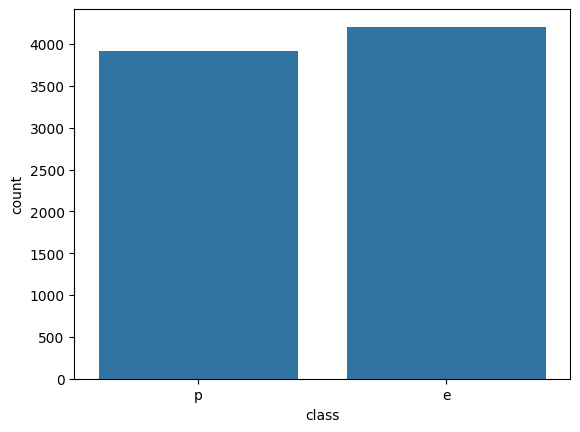

In [7]:
sns.countplot(data=df, x='class')
plt.show()

## Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder().fit(df['class'])
df['class'] = le.transform(df['class'])

In [10]:
le.classes_

array(['e', 'p'], dtype=object)

In [11]:
df['class'].head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [13]:
indept = df.drop('class', axis=1) 
df = pd.get_dummies(df, columns=indept.columns, drop_first=True)
df.head()

,class,cap-shape_c_True,cap-shape_f_True,cap-shape_k_True,cap-shape_s_True,cap-shape_x_True,cap-surface_g_True,cap-surface_s_True,cap-surface_y_True,cap-color_c_True,...,population_n_True,population_s_True,population_v_True,population_y_True,habitat_g_True,habitat_l_True,habitat_m_True,habitat_p_True,habitat_u_True,habitat_w_True
0,1,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,0,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [14]:
df.shape

(8124, 96)

In [15]:
df = df.astype(int)
print(df.dtypes)

class               int64
cap-shape_c_True    int64
cap-shape_f_True    int64
cap-shape_k_True    int64
cap-shape_s_True    int64
                    ...  
habitat_l_True      int64
habitat_m_True      int64
habitat_p_True      int64
habitat_u_True      int64
habitat_w_True      int64
Length: 96, dtype: object


In [16]:
df.head()

,class,cap-shape_c_True,cap-shape_f_True,cap-shape_k_True,cap-shape_s_True,cap-shape_x_True,cap-surface_g_True,cap-surface_s_True,cap-surface_y_True,cap-color_c_True,...,population_n_True,population_s_True,population_v_True,population_y_True,habitat_g_True,habitat_l_True,habitat_m_True,habitat_p_True,habitat_u_True,habitat_w_True
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
df.corr()['class'].drop('class')

cap-shape_c_True    0.023007
cap-shape_f_True    0.018526
cap-shape_k_True    0.163565
cap-shape_s_True   -0.060664
cap-shape_x_True   -0.026886
                      ...   
habitat_l_True      0.155150
habitat_m_True     -0.138627
habitat_p_True      0.323346
habitat_u_True      0.112078
habitat_w_True     -0.150087
Name: class, Length: 95, dtype: float64

/var/folders/2p/l3_rswxs39v4k07prtbct94c0000gn/T/ipykernel_5776/547134963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


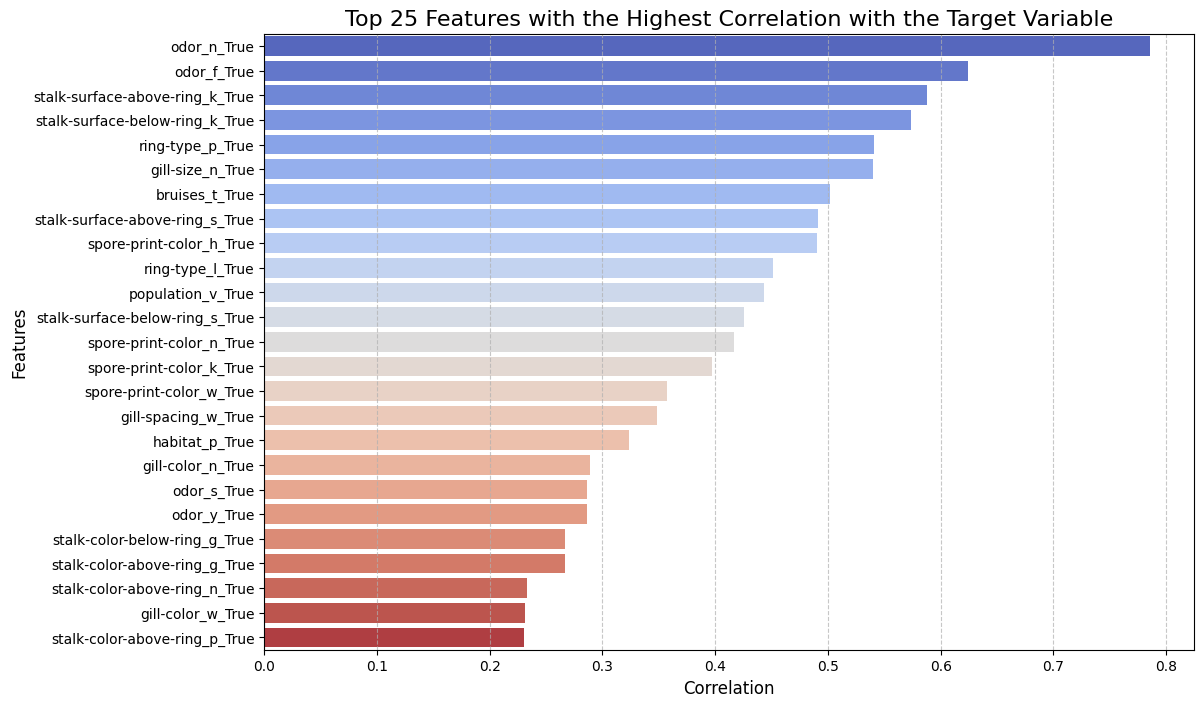

In [20]:
correlations = df.corr()['class'].drop('class')  
top_25_features = correlations.abs().sort_values(ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_25_features.values, 
    y=top_25_features.index, 
    palette='coolwarm'
)
plt.title('Top 25 Features with the Highest Correlation with the Target Variable', fontsize=16)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [17]:
selected_columns = top_25_features.index.tolist() + ['class'] 
new_df = df[selected_columns]

print(new_df.head())
print(new_df.shape)

   odor_n  odor_f  stalk-surface-above-ring_k  stalk-surface-below-ring_k  \
0       0       0                           0                           0   
1       0       0                           0                           0   
2       0       0                           0                           0   
3       0       0                           0                           0   
4       1       0                           0                           0   

   ring-type_p  gill-size_n  bruises_t  stalk-surface-above-ring_s  \
0            1            1          1                           1   
1            1            0          1                           1   
2            1            0          1                           1   
3            1            1          1                           1   
4            0            0          0                           1   

   spore-print-color_h  ring-type_l  ...  habitat_p  gill-color_n  odor_s  \
0                    0            0  ..

In [18]:
X = new_df.drop("class", axis= 1)
y = new_df["class"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (6499, 25) (6499,)
Test set shape: (1625, 25) (1625,)


In [20]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, ConfusionMatrixDisplay, f1_score

# Logistic Reg

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

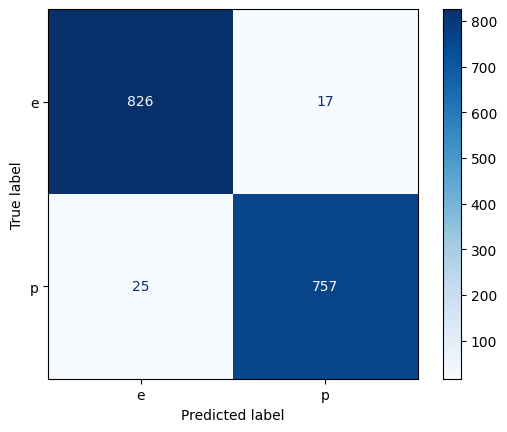

In [23]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
precision_score(y_pred, y_test)

np.float64(0.9680306905370843)

In [26]:
recall_score(y_pred, y_test)

np.float64(0.9780361757105943)

In [27]:
f1_score(y_pred, y_test)

np.float64(0.9730077120822622)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model1 = LogisticRegression().fit(X_train, y_train)
model2 = DecisionTreeClassifier().fit(X_train, y_train)
model3 = KNeighborsClassifier().fit(X_train, y_train)

In [30]:
# Make predictions (Soft Voting Example)
pred_proba1 = model1.predict_proba(X_test)
pred_proba2 = model2.predict_proba(X_test)
pred_proba3 = model3.predict_proba(X_test)

In [31]:
pred_proba1, pred_proba2, pred_proba3

(array([[9.99972489e-01, 2.75113554e-05],
        [2.00019834e-03, 9.97999802e-01],
        [3.71100972e-06, 9.99996289e-01],
        ...,
        [1.19783413e-05, 9.99988022e-01],
        [6.95225018e-03, 9.93047750e-01],
        [5.53293390e-03, 9.94467066e-01]]),
 array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [32]:
avg_proba = (pred_proba1 + pred_proba2 + pred_proba3) / 4
avg_proba

array([[7.49993122e-01, 6.87783885e-06],
       [5.00049585e-04, 7.49499950e-01],
       [9.27752431e-07, 7.49999072e-01],
       ...,
       [2.99458534e-06, 7.49997005e-01],
       [1.73806255e-03, 7.48261937e-01],
       [1.38323348e-03, 7.48616767e-01]])

In [33]:
final_preds = np.argmax(avg_proba, axis=1)
final_preds

array([0, 1, 1, ..., 1, 1, 1])

In [34]:
le.classes_[final_preds]

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [35]:
precision_score(y_test, final_preds)

np.float64(1.0)

In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
model1 = ('dt', DecisionTreeClassifier(random_state=42))
model2 = ('rf', RandomForestClassifier(random_state=42))
model3 = ('lr', LogisticRegression(max_iter=1000, random_state=42))
model4 = ('svc', SVC(probability=True, random_state=42))

In [39]:
voting_clf = VotingClassifier(estimators=[model1, model2, model3, model4], voting='soft')

In [40]:
voting_clf

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [41]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

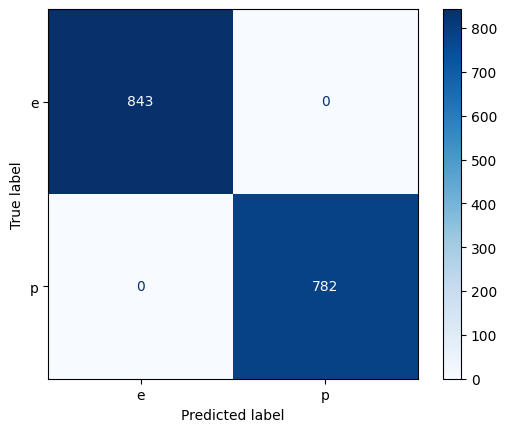

In [42]:
ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

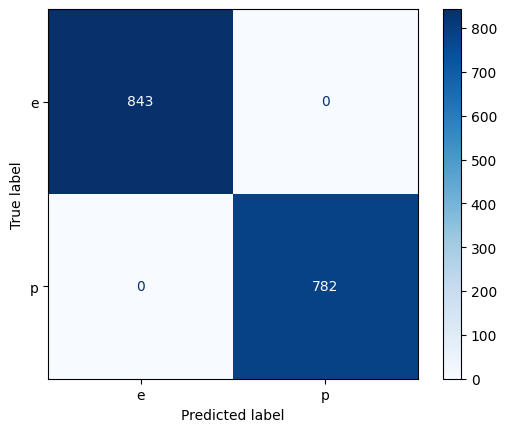

In [45]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()

In [46]:
y_pred = clf.predict(X_test)

In [47]:
precision_score(y_pred, y_test)

np.float64(1.0)

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

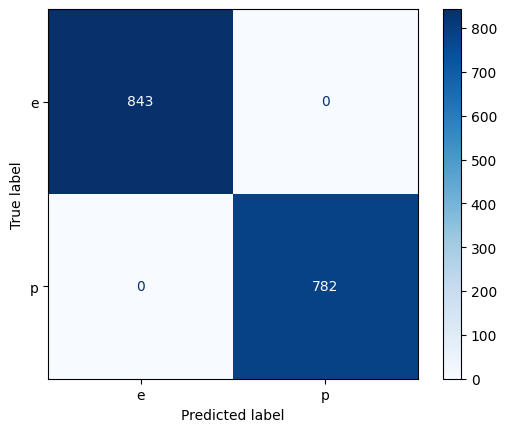

In [50]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()

# AdaBoosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

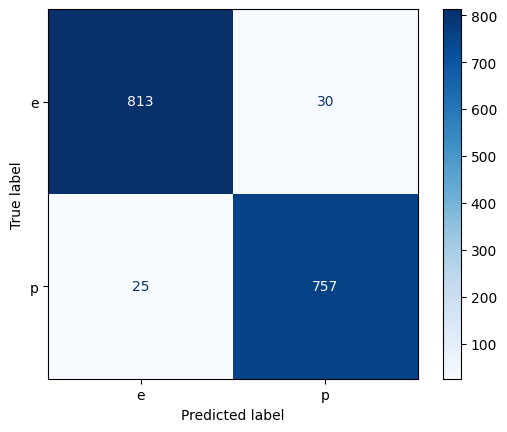

In [53]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()

# Stacking Generalizatioin

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

In [56]:
# meta model
meta_model = LogisticRegression()

In [57]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [58]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

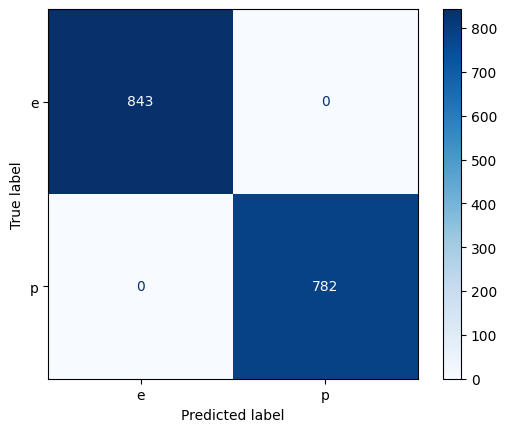

In [59]:
ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()